# Statistische Mechanik
## 4. Abgabe aus der Modellbildung und Simulation
Nicholas Meyer, Alexandra Mayer

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Von der Mechanik zur statistischen Mechanik
Betrachten Sie vier Scheiben in einem Quadrat.

#### (a)
Simulieren Sie die Bewegung der Scheiben mit Hilfe der Molekulardynamit (event driven molecular dynamics). Visualisieren Sie die Bewegung der vier Scheiben mit verschiedenen Genauigkeiten. Wählen Sie verschiedenen Anfangsbedingungen. Berechnen Sie bei jedem Zeitschritt die Gesamtenergie und erstellen Sie ein Historgramm der x-Positionen.

#### (b)
Implementieren Sie den Markov-Monte-Carlo-Algorithmus und erzeugen Sie erlaubte Konfigurationen. Erstellen Sie ein Histogramm der x-Postionen. Vergleichen Sie mit dem Histogram aus (a).

### 2. Monte-Carlo-Verfahren zur Integration

#### (a)
Schreiben Sie einen Zufallsgenerator für Zufallszahlen, die nach den Wahrscheinlichkeitsverteilungen (i) $p(x) = e^{-x}$ und (ii) $p(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ verteilt sind.

[-2.46431107  1.0932398  -0.18140033  0.65113887  0.92931566 -0.39884246
 -0.12378938 -0.48653251  0.28934063 -0.99292756]
[0.69446092 0.71434451 0.87024502 1.03229359 0.24024896 0.11312922
 0.54772527 0.79320316 0.02944069 0.32707849]


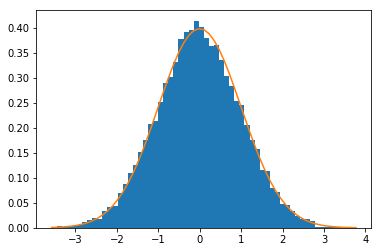

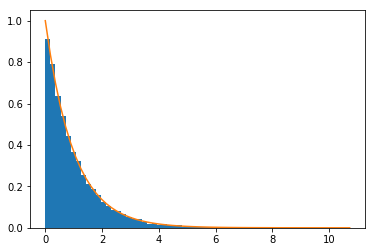

In [26]:
# (ii)
def random_norm(n):
    return np.random.randn(n)
# (i)
def random_exp(n):
    return np.random.exponential(1, n)

print(random_norm(10))
print(random_exp(10))
counts, bins, ignored = plt.hist(random_norm(10000), 60, density=True)
plt.plot(bins, (1/(np.sqrt(2*np.pi)))*np.exp(-((bins)**2)/2))
plt.show()
counts, bins, ignored = plt.hist(random_exp(10000), 60, density=True)
plt.plot(bins, np.exp(-bins))

#### (b)
Bestimmen Sie das Volumen einer Kugel in 10 Dimensionen (Radius 1) mit Hilfe einer Monte-Carlo-Methode

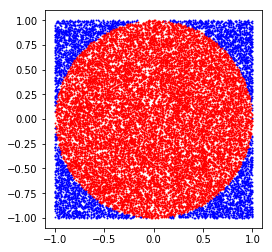

3.1364
3.141592653589793


In [99]:
import math
No = 0
N = 20000
for k in range(1, 2):
    cords = []
    No = 0
    for j in range(0, N):
        r = np.random.rand(2)
        if r[0] > 1 or r[0] < -1:
            r0 = math.fmod(r[0], 1)*2-1
        else:
            r0 = r[0]*2-1
        if r[1] > 1 or r[1] < -1:
            r1 = math.fmod(r[1], 1)*2-1
        else:
            r1 = r[1]*2-1
        cords.append(np.array([r0, r1]))
        #print(r)
        #print('modulu', math.fmod(r[0], 1))
    cords = np.array(cords)
    #print(cords)
    for i in range(0, len(cords)):
        if np.linalg.norm(cords[i]) <= 1:
            plt.plot(cords[i, 0], cords[i, 1], 'or', ms=0.9)
            No += 1
        else:
            plt.plot(cords[i, 0], cords[i, 1], 'ob', ms=0.9)
    plt.axis('scaled')
    plt.show()
    print((No/N)*4)
    print(np.pi)

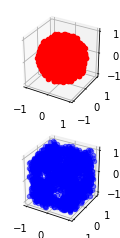

3.1125
3.141592653589793
4.18879020478639
4.1887902047863905
4.15


In [128]:
from mpl_toolkits import mplot3d
No = 0
N = 4000
for k in range(1, 2):
    cords = []
    No = 0
    for j in range(0, N):
        r = np.random.rand(3)
        if r[0] > 1 or r[0] < -1:
            r0 = math.fmod(r[0], 1)*2-1
        else:
            r0 = r[0]*2-1
        if r[1] > 1 or r[1] < -1:
            r1 = math.fmod(r[1], 1)*2-1
        else:
            r1 = r[1]*2-1
        if r[2] > 1 or r[2] < -1:
            r2 = math.fmod(r[2], 1)*2-1
        else:
            r2 = r[2]*2-1
        cords.append(np.array([r0, r1, r2]))
        #print(r)'
        #print('modulu', math.fmod(r[0], 1))
    cords = np.array(cords)
    #print(cords)
    fig = plt.figure()
    ax = fig.add_subplot(211, projection='3d')
    ax2 = fig.add_subplot(212, projection='3d')
    for i in range(0, len(cords)):
        if np.linalg.norm(cords[i]) <= 1:
            ax.scatter3D(cords[i, 0], cords[i, 1], cords[i, 2], c='r', marker='o')
            No += 1
        else:
            ax2.scatter3D(cords[i, 0], cords[i, 1], cords[i, 2], c='b', marker='o', alpha=0.5)
    ax.axis('scaled')
    ax2.axis('scaled')
    plt.show()
    print(((3*2**3*No)/(4*N)))
    print(np.pi)
    print(V(1, 3))
    print(4/3*np.pi)
    print((No/N)*2**3)

In [113]:
from scipy.special import gamma
def V(r, n):
    return ((np.sqrt(np.pi)**n)/gamma((n/2)+1))*r**n

In [141]:
No = 0
N = 100000
fs = []
for k in range(1, 100):
    cords = []
    No = 0
    for j in range(0, N):
        r = np.random.rand(10)
        for i in range(0, 10):
            r[i] = math.fmod(r[i], 1)*2-1
        cords.append(np.array(r))
        if np.linalg.norm(r) <= 1:
            No += 1
    #print(((3*2**3*No)/(4*N)))
    #print(np.pi)
    #print(V(1, 10))
    #print((No/N)*2**10)
    fs.append((No/N)*2**10)
print('mean', np.mean(np.array(fs)))
print(V(1, 10))

mean 2.5467604040404037
2.5501640398773433


In [94]:
max(cords[:, 1])

0.9998278553560629

#### (c)
Bestimmen Sie die folgenden Integrale mit einer Monte-Carlo-Methode $$\int_{0}^{2} \mathrm{sin}^2 \left(\frac{1}{x(2-x)}\right) dx $$
$$ \int_{0}^{1} \frac{x^{-\frac{1}{2}}}{e^x+1} dx $$
und schätzen Sie den Fehler ab.

### 3. Ising-Modell
Schreiben Sie eine Metropolis-Monte-Carlo-Simulation für ein quadratisches Gritter von $20 \times 20$ Spins für das Ising-Modell mit der Gesamtenergie $E=-\sum_{i, j}{J_{ij}s_is_j}$. $J_{ij}$ sei $J$ wenn $i$ und $j$ nächste Nachbarn sind, sonst null. Am Anfang seien alle Spin-Variablen zufällig gewält ($\pm 1$). Flippen Sie einen Spin und akzeptieren den neuen Zustand mit der Metropolis-Bedingung. Plotten Sie die Magnetisierung ($M=\sum_{i}s_i$) als Funktion der Zeit (Monte-Carlo-Schritte) für verschiedene Temperaturen und die Gesamtmagnetisierung als Funktion der Temperatur.

### 4. Simulierte Abkühlung und Problem des Handlungsreisenden

#### (a)
Bestimmen Sie das globale Minimum der Funktionen $$f(x)=x^2-\mathrm{cos}(4\pi x)$$ und $$ f(x) = \mathrm{cos}(x) + \mathrm{cos}(\sqrt{2}x)+\mathrm{cos}(\sqrt{3}x)$$
mit Hilfe der simulierten Abkühlung. Plotten Sie $x$ als Funktion der Zeit (Monte-Carlo-Schritte).

#### (b)
Finden Sie den kürzesten Weg für das Handlungsreisenden-Problem für 25 Städte mit Hilfe der simulierten Abkühlung.